# Python part of the PwC homework

## Data Loading and Cleaning (Python - Pandas)
1. Load the dataset into a Pandas DataFrame.
2. Perform data cleaning steps: handle missing values and remove duplicates.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv('DataSet_for_jupiter_2.csv',sep=',',skiprows=1)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ProductCategory  96 non-null     object 
 1   Product          96 non-null     object 
 2   TotalSales       91 non-null     float64
 3   Quantity         96 non-null     int64  
 4   Month            96 non-null     object 
 5   UnitPrice        96 non-null     int64  
 6   CustomerID       96 non-null     int64  
 7   Discount         96 non-null     float64
 8   OrderDate        96 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 6.9+ KB
None


In [2]:
#We can see that "TotalSales" column has some Null values. Let's delete the duplicates and look once again at the null values
#After dropping duplicates we'll also need to reset indexes
data_with_no_duplicates=data.drop_duplicates().reset_index(drop = True)
print(data_with_no_duplicates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ProductCategory  74 non-null     object 
 1   Product          74 non-null     object 
 2   TotalSales       70 non-null     float64
 3   Quantity         74 non-null     int64  
 4   Month            74 non-null     object 
 5   UnitPrice        74 non-null     int64  
 6   CustomerID       74 non-null     int64  
 7   Discount         74 non-null     float64
 8   OrderDate        74 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 5.3+ KB
None


In [3]:
#There are 4 Null values now in the "TotalSales" coumn
#We'll calculate the median value of the "TotalSales" column and will replace the Null values with it
#It is done in order to preserve as much data as we can
median_ts=data_with_no_duplicates["TotalSales"].median()
print(median_ts)

600.0


In [4]:
#Let's have a look at the rows with Null values in "TotalSales" column
#There are 4 rows like that as we mentioned before
print(data_with_no_duplicates[data_with_no_duplicates["TotalSales"].isnull()==True])

   ProductCategory Product  TotalSales  Quantity    Month  UnitPrice  \
9         Clothing     Hat         NaN         4  2021-05         40   
14     Electronics  Router         NaN         8  2021-08         80   
30        Clothing  Shorts         NaN         9  2021-07         50   
39        Clothing  Shorts         NaN         9  2021-07         50   

    CustomerID  Discount   OrderDate  
9          110      0.05  2021-05-08  
14         115      0.10  2021-08-18  
30         114      0.05  2021-07-12  
39         114      0.05  2021-07-11  


In [5]:
#We'll insert the median value into the Null values of "TotalSales" column
#and we'll make sure the values changed by printing out new values
df_cleaned=data_with_no_duplicates
df_cleaned['TotalSales'] = df_cleaned['TotalSales'].fillna(median_ts)
print(df_cleaned.iloc[[9,14,30,39]])

   ProductCategory Product  TotalSales  Quantity    Month  UnitPrice  \
9         Clothing     Hat       600.0         4  2021-05         40   
14     Electronics  Router       600.0         8  2021-08         80   
30        Clothing  Shorts       600.0         9  2021-07         50   
39        Clothing  Shorts       600.0         9  2021-07         50   

    CustomerID  Discount   OrderDate  
9          110      0.05  2021-05-08  
14         115      0.10  2021-08-18  
30         114      0.05  2021-07-12  
39         114      0.05  2021-07-11  


* Calculate the total sales amount for each product.
* Find the average selling price for each product category.
* Highlight the top 5 products with the highest sales.

In [6]:
#Let's calculate the total sales per product
total_sales_per_product = df_cleaned.groupby('Product')['TotalSales'].sum()
print(total_sales_per_product)

Product
Belt                  300.0
Bluetooth Speaker    1500.0
Camera               2200.0
Dress                 700.0
External HDD         3600.0
Gloves                400.0
Graphics Card        5400.0
Hat                  1800.0
Headphones            800.0
Jeans                1000.0
Keyboard             1400.0
Laptop               4500.0
Mouse                 500.0
Printer              2400.0
Router               2200.0
Scarf                1200.0
Shoes                 600.0
Shorts               2550.0
Smart Thermostat     3600.0
Smartphone           2400.0
Smartwatch            900.0
Socks                 200.0
Sunglasses            900.0
Sweater              1500.0
Swimwear             1800.0
T-Shirt               300.0
Tablet               1000.0
Umbrella              750.0
VR Headset           1800.0
Winter Jacket        3200.0
Name: TotalSales, dtype: float64


In [7]:
# In order to find the average selling price for each product category per one product we'll need to 
# divide the sum of values in "TotalSales" column by the sum of values in "Quantity" column
average_selling_price = df_cleaned.groupby('ProductCategory').apply(lambda x: (x['TotalSales'].sum() / x['Quantity'].sum()))
average_selling_price = average_selling_price.rename("AverageSellingPrice").reset_index()
print(average_selling_price)

  ProductCategory  AverageSellingPrice
0        Clothing            78.899083
1     Electronics           106.211180


In [8]:
# Now we'll calculate the top 5 products by the highest sum of sales
total_sales_per_product = df_cleaned.groupby('Product')['TotalSales'].sum()
top_5_products = total_sales_per_product.nlargest(5)
print(top_5_products)

Product
Graphics Card       5400.0
Laptop              4500.0
External HDD        3600.0
Smart Thermostat    3600.0
Winter Jacket       3200.0
Name: TotalSales, dtype: float64


## Descriptive Statistics (Python - Pandas):
1. Calculate descriptive statistics for the 'Quantity' column (mean, median, standard deviation, min, max).

In [9]:
quantity_stats = df_cleaned['Quantity'].describe()
print(quantity_stats)

count    74.000000
mean      7.297297
std       3.280201
min       2.000000
25%       5.000000
50%       7.000000
75%       9.000000
max      15.000000
Name: Quantity, dtype: float64


## Statistical Analysis (Python - Scipy):
1. Perform a t-test to compare the average sales of two different product categories. Provide interpretation.

In [10]:
sales_electronics = df_cleaned[df_cleaned['ProductCategory'] == 'Electronics']['TotalSales']
sales_clothing = df_cleaned[df_cleaned['ProductCategory'] == 'Clothing']['TotalSales']
t_stat, p_value = ttest_ind(sales_electronics, sales_clothing, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 6.7979
P-value: 0.0000


* We can conclude there is a significant difference in average sales between Electronics and Clothing.
* By looking at t-statistic value we can also conclude that the average sales for Electronics are higher

##  Correlation Analysis (Python - Pandas):
1. Calculate the correlation matrix between numerical columns.
2. Identify and visualize the strongest correlation.


In [11]:
# Let's take a look at the correlation matrix
correlation_matrix = df_cleaned.corr()
print(correlation_matrix)

            TotalSales  Quantity  UnitPrice  CustomerID  Discount
TotalSales    1.000000  0.822036   0.745257   -0.107850  0.868107
Quantity      0.822036  1.000000   0.620512   -0.290668  0.695204
UnitPrice     0.745257  0.620512   1.000000   -0.383377  0.636802
CustomerID   -0.107850 -0.290668  -0.383377    1.000000 -0.066730
Discount      0.868107  0.695204   0.636802   -0.066730  1.000000


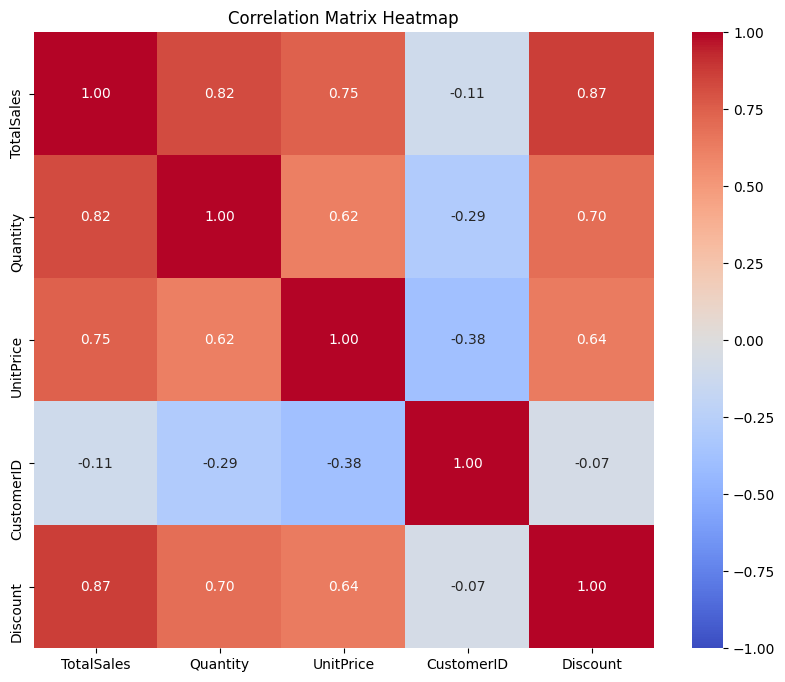

In [12]:
# In order to visualize the correlation matrix better we'll create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

plt.title('Correlation Matrix Heatmap')
plt.show()


* We can ignore the values of '1' on the diagonal - the correlation of columns with itself will always be 1
* We can see, that the highest value of correlation is between 'TotalSales' and 'Discount' columns
* This is also correct according to our logic - the more you order the bigger discount you get

## Data Visualization (Python - Matplotlib/Seaborn):
1. Create a bar plot to visualize the total sales for each product category.
2. Generate a line plot to show the monthly sales trend.


In [13]:
# We'll group our cleaned df by 'ProductCategory' and sum the 'TotalSales'
total_sales_per_category = df_cleaned.groupby('ProductCategory')['TotalSales'].sum().reset_index()

print(total_sales_per_category)

  ProductCategory  TotalSales
0        Clothing     17200.0
1     Electronics     34200.0


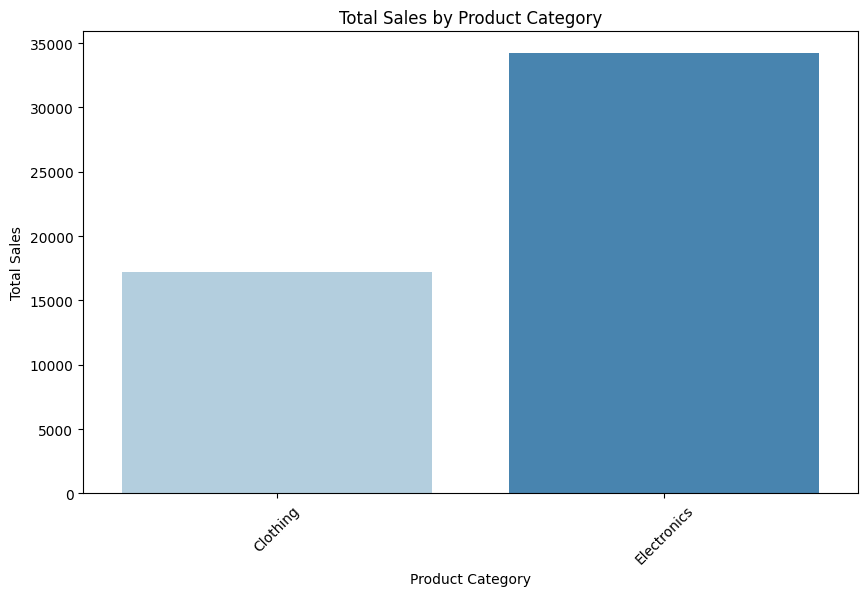

In [14]:
# Now we can create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='ProductCategory', y='TotalSales', data=total_sales_per_category, palette='Blues')

plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Category')

plt.xticks(rotation=45)

plt.show()

In [15]:
# in order to show monthly sales trend as a graph we'll first ensure 'OrderDate' is in datetime format
df_cleaned['OrderDate'] = pd.to_datetime(df_cleaned['OrderDate'])

# Now we can group by 'Month' and calculate the total sales for each month
monthly_sales = df_cleaned.groupby('Month')['TotalSales'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)
monthly_sales = monthly_sales.rename(columns={'Month': 'MonthYear'})

print(monthly_sales)

   MonthYear  TotalSales
0    2021-01      5500.0
1    2021-02      2700.0
2    2021-03      1400.0
3    2021-04      1700.0
4    2021-05      2700.0
5    2021-06      3700.0
6    2021-07      4950.0
7    2021-08      3400.0
8    2021-09       900.0
9    2021-10      1700.0
10   2021-11      3800.0
11   2021-12      6300.0
12   2022-01      2250.0
13   2022-02      6800.0
14   2022-03      3600.0


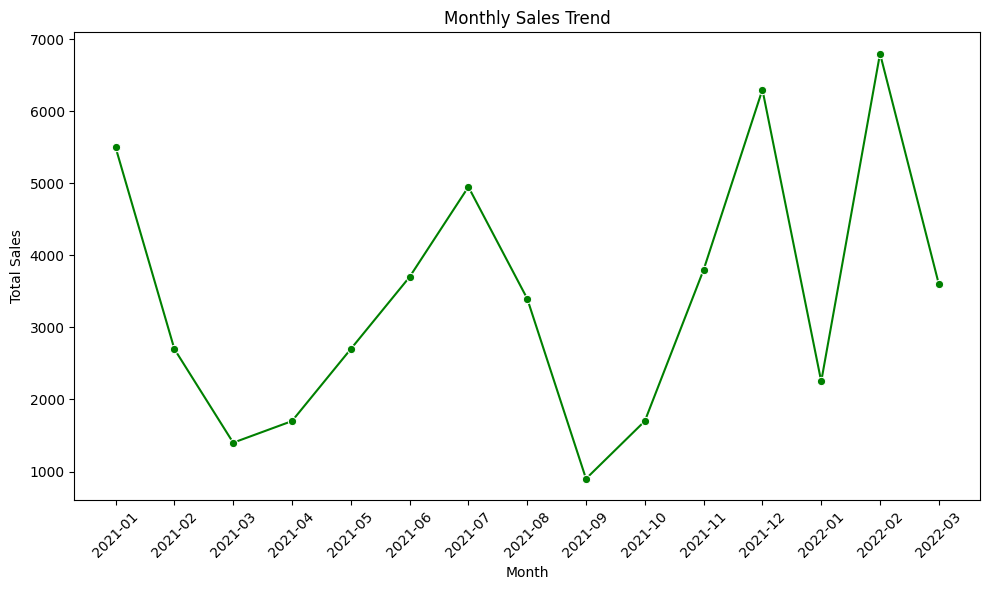

In [16]:
# We'll create the line plot to show monthly sales trend using seaborn
plt.figure(figsize=(10, 6))  
sns.lineplot(x='MonthYear', y='TotalSales', data=monthly_sales, marker='o', color='green')

plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##  Time Series Analysis (Python - Statsmodels):
1. Use a time series decomposition method to decompose the monthly sales data into trend, seasonality, and residual components.
2. Visualize the decomposed time series.


In [17]:
# We ensure that this time 'MonthYear' is converted to datetime
monthly_sales['MonthYear'] = pd.to_datetime(monthly_sales['MonthYear'])

# Now we set the 'MonthYear' column as the index
monthly_sales.set_index('MonthYear', inplace=True)

print(monthly_sales)

            TotalSales
MonthYear             
2021-01-01      5500.0
2021-02-01      2700.0
2021-03-01      1400.0
2021-04-01      1700.0
2021-05-01      2700.0
2021-06-01      3700.0
2021-07-01      4950.0
2021-08-01      3400.0
2021-09-01       900.0
2021-10-01      1700.0
2021-11-01      3800.0
2021-12-01      6300.0
2022-01-01      2250.0
2022-02-01      6800.0
2022-03-01      3600.0


In [18]:
# Now the data is ready to perform the decomposition with seasonality period of 4 (4 quarters of the year)
decomposition = seasonal_decompose(monthly_sales['TotalSales'], model='additive', period=4)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

print(trend.head(), seasonal.head(), residual.head())

MonthYear
2021-01-01        NaN
2021-02-01        NaN
2021-03-01    2475.00
2021-04-01    2250.00
2021-05-01    2818.75
Name: trend, dtype: float64 MonthYear
2021-01-01   -1210.416667
2021-02-01    -212.500000
2021-03-01     520.833333
2021-04-01     902.083333
2021-05-01   -1210.416667
Name: seasonal, dtype: float64 MonthYear
2021-01-01            NaN
2021-02-01            NaN
2021-03-01   -1595.833333
2021-04-01   -1452.083333
2021-05-01    1091.666667
Name: resid, dtype: float64


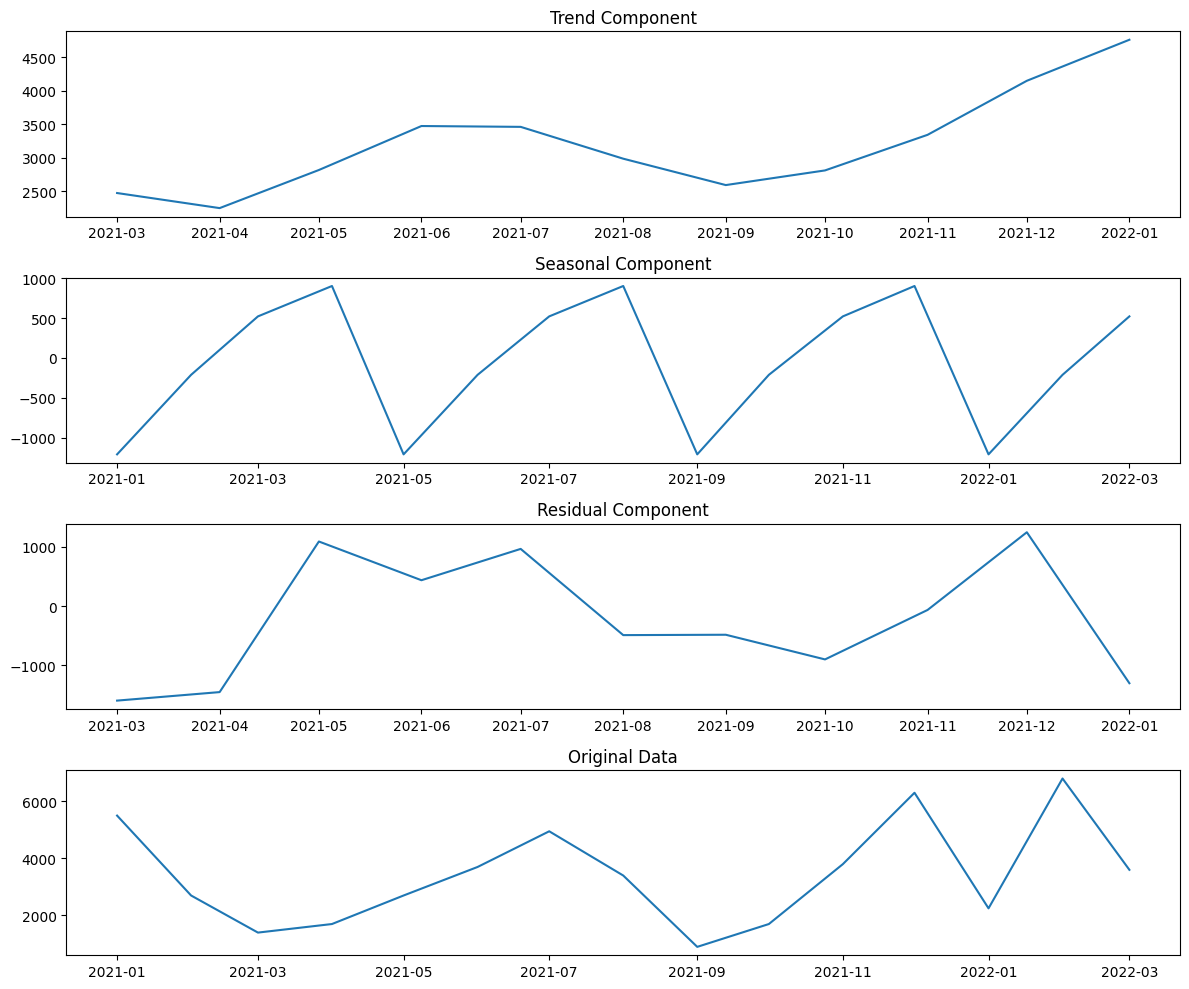

In [19]:
# Here we plot the decomposed components
plt.figure(figsize=(12, 10))

# Plot Trend
plt.subplot(411)
plt.plot(decomposition.trend)
plt.title('Trend Component')

# Plot Seasonal
plt.subplot(412)
plt.plot(decomposition.seasonal)
plt.title('Seasonal Component')

# Plot Residual
plt.subplot(413)
plt.plot(decomposition.resid)
plt.title('Residual Component')

# Plot Original Data
plt.subplot(414)
plt.plot(monthly_sales['TotalSales'])
plt.title('Original Data')

# Show the plots
plt.tight_layout()
plt.show()